In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sys
from math import sin
from sklearn.metrics import classification_report

In [ ]:
# %load_ext tensorboard
! rmdir /Q /S logs
# ! forfiles /P "ModelAcc" /M * /C "cmd /c if @isdir==FALSE del @file"
# ! forfiles /P "ModelLoss" /M * /C "cmd /c if @isdir==FALSE del @file"

In [ ]:
# Generating features
# np.random.seed(100)
# x1 = tf.constant(np.random.randint(50, size =(100,13)), dtype = tf.float32)
# y1 = tf.constant(np.random.randint(2, size =(100,)), dtype = tf.int32)

# x2 = tf.constant(np.random.randint(50, size =(100,6)), dtype = tf.float32)
# y2 = tf.constant(np.random.randint(2, size =(100,)), dtype = tf.int32)

# # from csv dataframe
train_df = pd.read_csv("data/heart.csv")
train_labels = train_df.pop('target')
# dataset = tf.data.Dataset.from_tensor_slices((train_df.values,train_labels))
# dataset = dataset.shuffle(len(train_df)).batch(10)
train_df

In [ ]:
train_df['age','sex']

In [ ]:
def show_batch(dataset):
    for batch, label in dataset.take(1):
        print("{:20s}: {}".format('labels',label))
        print(batch)
            
show_batch(dataset)

In [ ]:
def create_model1():
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=(13,)))
    model.add(tf.keras.layers.Dense(units = 6, activation='relu', name = 'd1'))
    model.add(tf.keras.layers.Dense(units = 2, activation='softmax', name = 'd2'))
    return model
def create_model2():
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=(13,)))
    model.add(tf.keras.layers.Dense(6, activation='relu'))
    model.add(tf.keras.layers.Dense(2, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    return model

def create_model3():
    input1 = tf.keras.Input(shape=(13,), name = 'I1')
    input2 = tf.keras.Input(shape=(6,), name = 'I2')
    
    hidden1 = tf.keras.layers.Dense(units = 4, activation='relu')(input1)
    hidden2 = tf.keras.layers.Dense(units = 4, activation='relu')(input2)
    hidden3 = tf.keras.layers.Dense(units = 3, activation='relu')(hidden1)
    hidden4 = tf.keras.layers.Dense(units = 3, activation='relu')(hidden2)
    output1 = tf.keras.layers.Dense(units = 2, activation='softmax', name ='O1')(hidden3)
    output2 = tf.keras.layers.Dense(units = 2, activation='softmax', name = 'O2')(hidden4)
    
    model = tf.keras.models.Model(inputs = [input1,input2], outputs = [output1,output2])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model
model = create_model1()

tf.keras.utils.plot_model(model, 'my_first_model.png', show_shapes=True)

In [ ]:
# history = model.fit(
#     x = {'I1':x1, 'I2':x2}, 
#     y = {'O1':y1, 'O2': y2},
#     batch_size = 1,
#     epochs = 1,
#     verbose = 1,
#     callbacks = None,
# #     validation_data = [(val_data,new_val_data),(val_labels, new_val_labels)]
# )

model.fit(x = x1, y = y1, epochs = 10)

In [ ]:
l = tf.keras.layers.Conv2d()

In [ ]:
x1 = tf.constant(np.array(range(1,224*224*3 + 1)), shape = (1,224, 224, 3), dtype = tf.float32)
x1

In [ ]:
layer = tf.keras.layers.Conv2D(1, 3, activation='relu', input_shape=(1,3, 3, 3))
y = layer(x1)
y.shape


In [ ]:
layer.weights

In [1]:
import tensorflow as tf
import numpy as np
np.random.seed(100)

In [2]:
# First training data
x1_train = np.random.uniform(1, 10, (240, 13))
y1_train = np.random.randint(0, 2, (240,))
x1_val = np.random.uniform(1, 10, (50, 13))
y1_val = np.random.randint(0, 2, (50,))

# Second training data
x2_train = np.random.uniform(1, 10, (240, 6))
y2_train = np.random.uniform(0, 1, (240,))
x2_val = np.random.uniform(1, 10, (50, 6))
y2_val = np.random.uniform(0, 1, (50,))


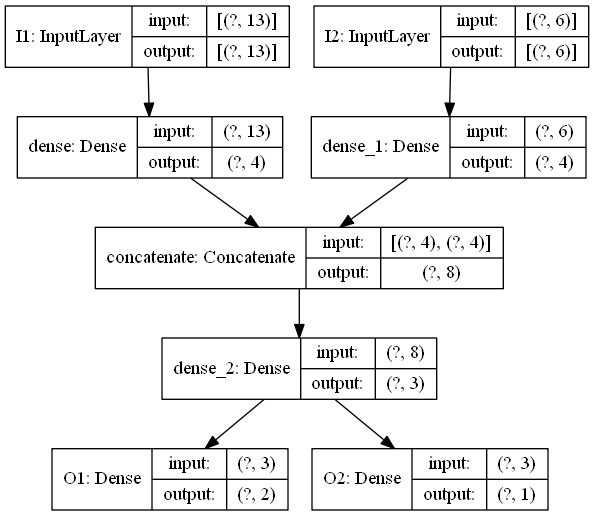

In [3]:
def create_model3():
    input1 = tf.keras.Input(shape=(13,), name = 'I1')
    input2 = tf.keras.Input(shape=(6,), name = 'I2')
    
    hidden1 = tf.keras.layers.Dense(units = 4, activation='relu')(input1)
    hidden2 = tf.keras.layers.Dense(units = 4, activation='relu')(input2)
    merge = tf.keras.layers.concatenate([hidden1, hidden2])
    hidden3 = tf.keras.layers.Dense(units = 3, activation='relu')(merge)
    output1 = tf.keras.layers.Dense(units = 2, activation='softmax', name ='O1')(hidden3)
    output2 = tf.keras.layers.Dense(units = 1, activation='linear', name = 'O2')(hidden3)
    
    model = tf.keras.models.Model(inputs = [input1,input2], outputs = [output1,output2])
    
    model.compile(optimizer='adam',
                  loss={'O1':'sparse_categorical_crossentropy','O2':'mse'},
                  metrics={'O1':['accuracy'],'O2':['mae']},
                  loss_weights=[1.0, 0.5])
    return model



model = create_model3()
tf.keras.utils.plot_model(model, 'my_first_model.png', show_shapes=True)

In [9]:
history = model.fit(
    x = {'I1':x1_train, 'I2':x2_train}, 
    y = {'O1':y1_train, 'O2': y2_train},
    batch_size = 1000,
    epochs = 10,
    validation_data = ([x1_val,x2_val],[y1_val, y2_val])
)

Epoch 1/10
1/1 [==============================] - 0s 101ms/step - loss: 0.9860 - O1_loss: 0.6951 - O2_loss: 0.5818 - O1_accuracy: 0.5042 - O2_mae: 0.5739 - val_loss: 1.1188 - val_O1_loss: 0.6907 - val_O2_loss: 0.8562 - val_O1_accuracy: 0.6200 - val_O2_mae: 0.6369
Epoch 2/10
1/1 [==============================] - 0s 52ms/step - loss: 0.9802 - O1_loss: 0.6950 - O2_loss: 0.5703 - O1_accuracy: 0.5042 - O2_mae: 0.5703 - val_loss: 1.1118 - val_O1_loss: 0.6907 - val_O2_loss: 0.8422 - val_O1_accuracy: 0.6200 - val_O2_mae: 0.6344
Epoch 3/10
1/1 [==============================] - 0s 45ms/step - loss: 0.9747 - O1_loss: 0.6950 - O2_loss: 0.5594 - O1_accuracy: 0.5042 - O2_mae: 0.5668 - val_loss: 1.1051 - val_O1_loss: 0.6907 - val_O2_loss: 0.8288 - val_O1_accuracy: 0.6200 - val_O2_mae: 0.6320
Epoch 4/10
1/1 [==============================] - 0s 36ms/step - loss: 0.9694 - O1_loss: 0.6949 - O2_loss: 0.5489 - O1_accuracy: 0.5000 - O2_mae: 0.5635 - val_loss: 1.0986 - val_O1_loss: 0.6907 - val_O2_loss: 0